In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from field import draw_field
from plot import set_style

In [2]:
def init_plot():
    fig = plt.figure(figsize=(150, 100))
    ax = plt.axes([0.05, 0.9, 0.05, 0.9])
    set_style()
    draw_field(ax, correct_aspect=True, arrow=False)

    return fig, ax

In [3]:
df = pd.read_csv('data/coordinates.csv')

df.head()

,name,x,y,left,right,up,down,angle,game,team_name
0,Héctor Bellerín,51.5340,3.0498,4,5,9,0,0.969149,Arsenal_Sheff Utd_2020-10-04,Arsenal
1,Kieran Tierney,60.5640,59.5578,6,3,0,9,0.963999,Arsenal_Sheff Utd_2020-10-04,Arsenal
2,Gabriel Magalhães,36.3090,47.9978,1,8,3,6,0.371277,Arsenal_Sheff Utd_2020-10-04,Arsenal
3,Bukayo Saka,63.0840,54.0498,7,2,2,7,0.824022,Arsenal_Sheff Utd_2020-10-04,Arsenal
4,Dani Ceballos,42.5565,40.8238,2,7,4,5,0.201031,Arsenal_Sheff Utd_2020-10-04,Arsenal


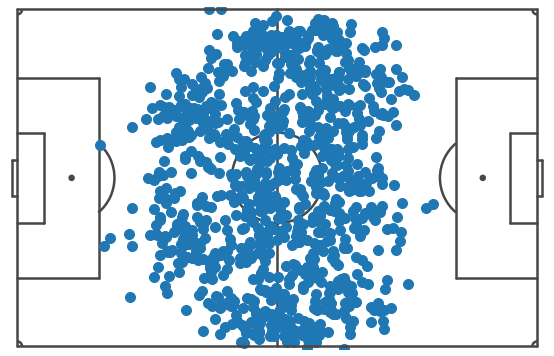

In [4]:
fig, ax = init_plot()

ax.plot(df['x'], df['y'], 'o', markersize=10)

In [11]:
from sklearn.cluster import AgglomerativeClustering

kmeans = AgglomerativeClustering(n_clusters=11).fit(df[['right', 'down', 'angle']])

df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

0     157
1     127
9     100
2      97
8      83
5      83
10     81
6      77
3      77
7      70
4      65
Name: cluster, dtype: int64

In [12]:
import plotly.express as px

colors = {
    0: 'dodgerblue',
    1: 'tomato',
    2: 'goldenrod',
    3: 'springgreen',
    4: 'slategrey',
    5: 'mediumorchid',
    6: 'lightpink',
    7: 'chocolate',
    8: 'mediumturquoise',
    9: 'purple',
    10: 'red',
    11: 'navy'
}

# positions = {
#     '0': 'RWB',
#     '1': 'CM',
#     '2': 'LW',
#     '3': 'RCB',
#     '4': 'ST',
#     '5': 'LB',
#     '6': 'RW',
#     '7': 'LWB',
#     '8': 'RB',
#     '9': 'LCB'
# }

df['cluster'] = df['cluster'].astype(str)
#df['position'] = df['cluster'].map(positions)
data = df.loc[df['team_name'] == 'Liverpool']

fig = px.scatter(data_frame=data,
                     x='x', 
                     y='y',
                     color='cluster',
                     hover_name='name'
    )

fig.update_xaxes(range=(0, 105))
fig.update_yaxes(range=(0, 68))

fig.show()